# **California Housing Price prediction using Simple Linear Regression**

Iteration: 0 Train MSE: 5.629742323103131 Test MSE: 5.53344670252374
Iteration: 100 Train MSE: 1.3597445811369764 Test MSE: 1.3545894654432
Iteration: 200 Train MSE: 0.7876516720241191 Test MSE: 0.7952708755316167
Iteration: 300 Train MSE: 0.7110028500726325 Test MSE: 0.7205397548329635
Iteration: 400 Train MSE: 0.7007334658293267 Test MSE: 0.7106027802246416
Iteration: 500 Train MSE: 0.699357577067417 Test MSE: 0.7092990544905012
Iteration: 600 Train MSE: 0.6991732359384556 Test MSE: 0.7091344940768475
Iteration: 700 Train MSE: 0.6991485379739344 Test MSE: 0.7091161477682669
Iteration: 800 Train MSE: 0.6991452289486783 Test MSE: 0.7091150445833394
Iteration: 900 Train MSE: 0.6991447856065504 Test MSE: 0.7091153926969952
Slope: 0.7984850913403571
Bias: 2.071857488845021


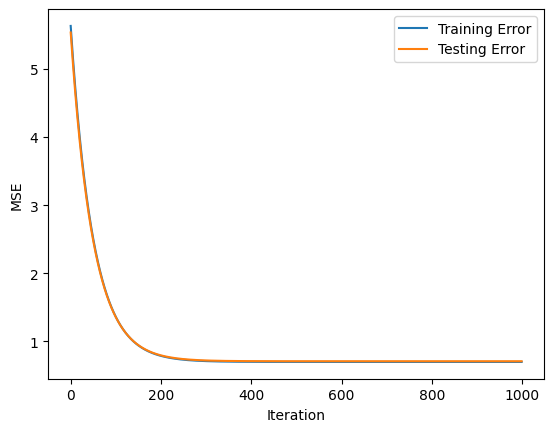

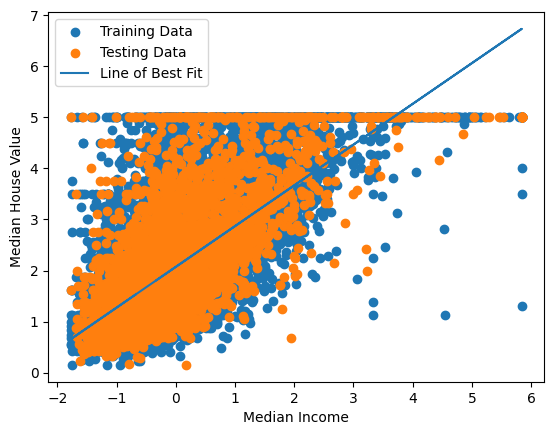

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# load the dataset and split into train and test sets
housing = fetch_california_housing(as_frame=True)
X = housing.data["MedInc"].values.reshape(-1, 1)
y = housing.target.values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# normalize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# add a column of ones to the input features for bias
X_train = np.c_[np.ones((len(X_train), 1)), X_train]
X_test = np.c_[np.ones((len(X_test), 1)), X_test]

# set the learning rate and number of iterations
learning_rate = 0.01
num_iterations = 1000

# initialize the weight vector
W = np.zeros((2, 1))

# perform gradient descent
train_errors = []
test_errors = []
for i in range(num_iterations):
    # calculate the predictions and the errors on the train and test sets
    y_train_pred = np.dot(X_train, W)
    train_error = y_train_pred - y_train
    y_test_pred = np.dot(X_test, W)
    test_error = y_test_pred - y_test
    
    # calculate the gradients on the train set
    grad_w = np.dot(X_train.T, train_error) / len(X_train)
    
    # update the weights
    W -= learning_rate * grad_w
    
    # calculate the mean squared errors on the train and test sets
    train_mse = np.mean(train_error ** 2)
    test_mse = np.mean(test_error ** 2)
    train_errors.append(train_mse)
    test_errors.append(test_mse)
    
    # print the current iteration and train/test errors
    if i % 100 == 0:
        print("Iteration:", i, "Train MSE:", train_mse, "Test MSE:", test_mse)

# print the final weights
print("Slope:", W[1][0])
print("Bias:", W[0][0])

# plot the training and testing errors over time
plt.plot(train_errors, label="Training Error")
plt.plot(test_errors, label="Testing Error")
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.show()

# plot the data and the line of best fit
plt.scatter(X_train[:, 1], y_train, label="Training Data")
plt.scatter(X_test[:, 1], y_test, label="Testing Data")
plt.plot(X_train[:, 1], np.dot(X_train, W), label="Line of Best Fit")
plt.legend()
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.show()


## **California Housing Price prediction using Simple Lasso Regression**

Slope: [ 0.80095744  0.12708701 -0.16275931  0.20620745 -0.         -0.03060176
 -0.79011254 -0.75567379]
Bias: [2.07194694]
Train MSE: 2.092673562821413
Test MSE: 2.0743943758887182


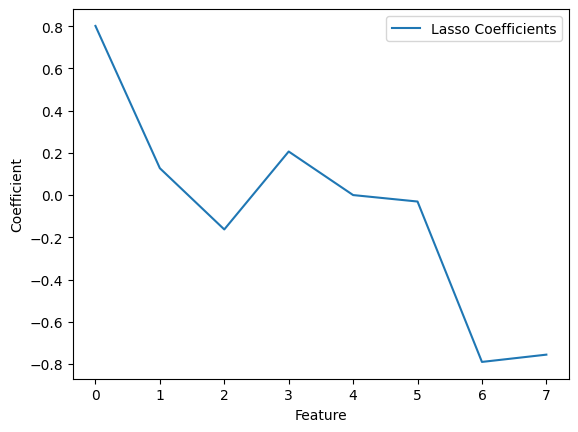

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

# load the dataset and split into train and test sets
housing = fetch_california_housing(as_frame=True)
X = housing.data.values
y = housing.target.values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# normalize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# perform Lasso regression
alpha = 0.01
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

# print the coefficients
print("Slope:", lasso.coef_)
print("Bias:", lasso.intercept_)

# calculate the mean squared errors on the train and test sets
train_mse = np.mean((lasso.predict(X_train) - y_train) ** 2)
test_mse = np.mean((lasso.predict(X_test) - y_test) ** 2)
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

# plot the training and testing errors over time
plt.plot(lasso.coef_, label="Lasso Coefficients")
plt.legend()
plt.xlabel("Feature")
plt.ylabel("Coefficient")
plt.show()


## **California Housing Price prediction using Simple Ridge Regression**

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

# load the dataset and split into train and test sets
housing = fetch_california_housing(as_frame=True)
X = housing.data
y = housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# normalize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# create a Ridge model and fit it to the training data
alpha = 1
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

# print the slope and bias
print("Slope:", ridge.coef_)
print("Bias:", ridge.intercept_)

# calculate the training and testing accuracy
train_acc = ridge.score(X_train, y_train)
test_acc = ridge.score(X_test, y_test)
print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)


Slope: [ 0.85432679  0.12262397 -0.29421036  0.33900794 -0.00228221 -0.04083302
 -0.89616759 -0.86907074]
Bias: 2.0719469373788777
Training Accuracy: 0.6125511218634558
Testing Accuracy: 0.5758157428913684
